Easy:

1. How many unique customers are in the dataset?

In [19]:
import pandas as pd

inv = pd.read_csv('fct_invoice.csv')
cst = pd.read_json('dim_customer.json')

cst.count()

#There are 5,191 unique customers in the dataset.

age           3035
first_name    5191
gender        5191
id            5191
last_name     5191
dtype: int64

2. What are the different categories of products available? How many unique categories are there?

In [21]:
inv.category.unique()

#Eight categories: Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, and Souvenirs.

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

3. Which payment method is the most popular? How many times was it used?

In [25]:
inv['payment_method'].value_counts()

#Cash is the most popular payment method, with 44,447 uses.

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

Medium:

1. What are the three most popular categories, by total sales?

In [50]:
inv.groupby('category')['quantity'].sum().sort_values()

#Clothing is the most popular category, with 103,558 units sold. 
#Cosmetics is the second most popular category, with 45,465 units sold. 
#Finally, Food & Beverage is the third most popular category, with 44,277 units sold. 

category
Souvenir            14871
Books               14982
Technology          15021
Shoes               30217
Toys                30321
Food & Beverage     44277
Cosmetics           45465
Clothing           103558
Name: quantity, dtype: int64

2. What are the total sales attributed to customers over the age of 45?

In [129]:
ages = pd.merge(inv , cst, how = 'outer', left_on = 'customer_id', right_on ='id')

ages_filter = ages.loc[ages['age'] > 45]
ages_filter.groupby('age')['quantity'].sum().sum()

#97,629 (units of) sales are attributed to customers over the age of 45.

97629

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

C:\Users\Ranon\AppData\Local\Temp\ipykernel_15864\17432164.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ages['invoice_date']= pd.to_datetime(ages['invoice_date'])


<Axes: xlabel='invoice_date'>

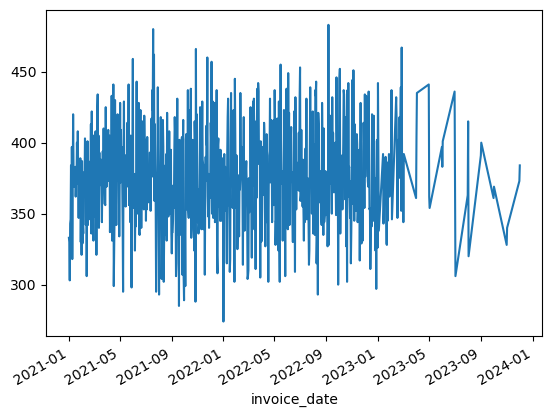

In [138]:
import matplotlib.pyplot as plt
import numpy as np

ages['invoice_date']= pd.to_datetime(ages['invoice_date'])
age_dates = ages.groupby('invoice_date')['quantity'].sum()
age_dates

age_dates.plot(x = 'invoice_date', y = '' )



